In [25]:
# CLASIFICACIÓN
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error # No se puede sacar en una base de datos categórica
from sklearn.metrics import classification_report

In [26]:
df = pd.read_csv('All_MTG_decks_for_land_prediction.csv', delimiter=',')

In [27]:
df

,Deck hyperlink,Total maindeck cards,Lands (without MDFCs),Average mana value (counting land/spell MDFCs as spells),Nonmythic land/spell MDFCs,Mythic land/spell MDFCs,Total land/spell MDFCs,Cheap card draw,Cheap mana prod,Sum of cheap card draw and cheap mana prod,Date of event,Format,Companion (based on sideboard inclusion),Companion present (1 or 0),Wins,Losses,Wins minus losses,Number of lands (incl partial MDFCs)
0,https://mtgmelee.com/Decklist/View/29181,60,28,3.750000,0,0,0,8,0,8,2020-07-01,Standard,NaN,0,2,1,1,28.0
1,https://mtgmelee.com/Decklist/View/29188,60,28,3.937500,0,0,0,4,4,8,2020-07-01,Standard,NaN,0,4,0,4,28.0
2,https://mtgmelee.com/Decklist/View/29190,60,26,3.382353,0,0,0,4,0,4,2020-07-01,Standard,NaN,0,3,1,2,26.0
3,https://mtgmelee.com/Decklist/View/29197,60,28,3.687500,0,0,0,4,0,4,2020-07-04,Standard,NaN,0,3,2,1,28.0
4,https://mtgmelee.com/Decklist/View/29211,60,29,3.709677,0,0,0,4,0,4,2020-07-01,Standard,NaN,0,2,1,1,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95138,https://magic.wizards.com/en/articles/archive/...,60,20,1.600000,0,0,0,6,2,8,2022-07-01,Modern,NaN,0,5,0,5,20.0
95139,https://magic.wizards.com/en/articles/archive/...,60,22,2.342105,0,0,0,0,8,8,2022-07-01,Modern,NaN,0,5,0,5,22.0
95140,https://magic.wizards.com/en/articles/archive/...,60,20,1.700000,0,0,0,10,1,11,2022-07-01,Modern,"Jegantha, the Wellspring",1,5,0,5,20.0
95141,https://magic.wizards.com/en/articles/archive/...,60,20,1.775000,0,0,0,0,0,0,2022-07-01,Modern,NaN,0,5,0,5,20.0


In [28]:
df.describe()

,Total maindeck cards,Lands (without MDFCs),Average mana value (counting land/spell MDFCs as spells),Nonmythic land/spell MDFCs,Mythic land/spell MDFCs,Total land/spell MDFCs,Cheap card draw,Cheap mana prod,Sum of cheap card draw and cheap mana prod,Companion present (1 or 0),Wins,Losses,Wins minus losses,Number of lands (incl partial MDFCs)
count,95143.0,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000,95143.000000
mean,60.0,22.066332,2.486260,0.746897,0.449912,1.196809,4.080847,1.880412,5.961258,0.147231,4.474381,1.257528,3.216853,22.683440
std,0.0,3.366811,0.692678,1.712522,1.113170,2.287515,4.643375,3.468715,5.483080,0.354338,1.358410,1.035485,1.716843,3.440194
min,60.0,11.000000,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,11.000000
25%,60.0,20.000000,2.027027,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,2.000000,20.000000
50%,60.0,22.000000,2.454545,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000,0.000000,5.000000,1.000000,3.000000,23.000000
75%,60.0,24.000000,2.944444,0.000000,0.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5.000000,2.000000,5.000000,25.000000
max,60.0,40.000000,5.926829,13.000000,10.000000,17.000000,19.000000,24.000000,35.000000,1.000000,14.000000,6.000000,13.000000,40.000000


In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total maindeck cards,95143.0,60.000000,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000
Lands (without MDFCs),95143.0,22.066332,3.366811,11.000000,20.000000,22.000000,24.000000,40.000000
Average mana value (counting land/spell MDFCs as spells),95143.0,2.486260,0.692678,0.545455,2.027027,2.454545,2.944444,5.926829
Nonmythic land/spell MDFCs,95143.0,0.746897,1.712522,0.000000,0.000000,0.000000,0.000000,13.000000
Mythic land/spell MDFCs,95143.0,0.449912,1.113170,0.000000,0.000000,0.000000,0.000000,10.000000
Total land/spell MDFCs,95143.0,1.196809,2.287515,0.000000,0.000000,0.000000,2.000000,17.000000
Cheap card draw,95143.0,4.080847,4.643375,0.000000,0.000000,3.000000,7.000000,19.000000
Cheap mana prod,95143.0,1.880412,3.468715,0.000000,0.000000,0.000000,4.000000,24.000000
Sum of cheap card draw and cheap mana prod,95143.0,5.961258,5.483080,0.000000,1.000000,4.000000,9.000000,35.000000
Companion present (1 or 0),95143.0,0.147231,0.354338,0.000000,0.000000,0.000000,0.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95143 entries, 0 to 95142
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Deck hyperlink                                            95143 non-null  object 
 1   Total maindeck cards                                      95143 non-null  int64  
 2   Lands (without MDFCs)                                     95143 non-null  int64  
 3   Average mana value (counting land/spell MDFCs as spells)  95143 non-null  float64
 4   Nonmythic land/spell MDFCs                                95143 non-null  int64  
 5   Mythic land/spell MDFCs                                   95143 non-null  int64  
 6   Total land/spell MDFCs                                    95143 non-null  int64  
 7   Cheap card draw                                           95143 non-null  int64  
 8   Cheap mana prod 

In [31]:
df.isnull().sum()

Deck hyperlink                                                  0
Total maindeck cards                                            0
Lands (without MDFCs)                                           0
Average mana value (counting land/spell MDFCs as spells)        0
Nonmythic land/spell MDFCs                                      0
Mythic land/spell MDFCs                                         0
Total land/spell MDFCs                                          0
Cheap card draw                                                 0
Cheap mana prod                                                 0
Sum of cheap card draw and cheap mana prod                      0
Date of event                                                   0
Format                                                          0
Companion (based on sideboard inclusion)                    81135
Companion present (1 or 0)                                      0
Wins                                                            0
Losses    

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95143 entries, 0 to 95142
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Deck hyperlink                                            95143 non-null  object 
 1   Total maindeck cards                                      95143 non-null  int64  
 2   Lands (without MDFCs)                                     95143 non-null  int64  
 3   Average mana value (counting land/spell MDFCs as spells)  95143 non-null  float64
 4   Nonmythic land/spell MDFCs                                95143 non-null  int64  
 5   Mythic land/spell MDFCs                                   95143 non-null  int64  
 6   Total land/spell MDFCs                                    95143 non-null  int64  
 7   Cheap card draw                                           95143 non-null  int64  
 8   Cheap mana prod 

In [33]:
def category(value):
    if int(value)>=25:
        return 'muchas'
    elif int(value)>20:
        return 'pocas'
    else:
        return 'casi nada'

In [34]:
df['Number of lands'] = df['Number of lands (incl partial MDFCs)'].apply(category)


In [36]:
df = df.drop('Number of lands (incl partial MDFCs)', axis=1)
df


,Deck hyperlink,Total maindeck cards,Lands (without MDFCs),Average mana value (counting land/spell MDFCs as spells),Nonmythic land/spell MDFCs,Mythic land/spell MDFCs,Total land/spell MDFCs,Cheap card draw,Cheap mana prod,Sum of cheap card draw and cheap mana prod,Date of event,Format,Companion (based on sideboard inclusion),Companion present (1 or 0),Wins,Losses,Wins minus losses,Number of lands
0,https://mtgmelee.com/Decklist/View/29181,60,28,3.750000,0,0,0,8,0,8,2020-07-01,Standard,NaN,0,2,1,1,muchas
1,https://mtgmelee.com/Decklist/View/29188,60,28,3.937500,0,0,0,4,4,8,2020-07-01,Standard,NaN,0,4,0,4,muchas
2,https://mtgmelee.com/Decklist/View/29190,60,26,3.382353,0,0,0,4,0,4,2020-07-01,Standard,NaN,0,3,1,2,muchas
3,https://mtgmelee.com/Decklist/View/29197,60,28,3.687500,0,0,0,4,0,4,2020-07-04,Standard,NaN,0,3,2,1,muchas
4,https://mtgmelee.com/Decklist/View/29211,60,29,3.709677,0,0,0,4,0,4,2020-07-01,Standard,NaN,0,2,1,1,muchas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95138,https://magic.wizards.com/en/articles/archive/...,60,20,1.600000,0,0,0,6,2,8,2022-07-01,Modern,NaN,0,5,0,5,casi nada
95139,https://magic.wizards.com/en/articles/archive/...,60,22,2.342105,0,0,0,0,8,8,2022-07-01,Modern,NaN,0,5,0,5,pocas
95140,https://magic.wizards.com/en/articles/archive/...,60,20,1.700000,0,0,0,10,1,11,2022-07-01,Modern,"Jegantha, the Wellspring",1,5,0,5,casi nada
95141,https://magic.wizards.com/en/articles/archive/...,60,20,1.775000,0,0,0,0,0,0,2022-07-01,Modern,NaN,0,5,0,5,casi nada


In [38]:
df['Number of lands'].unique()
print(df['Number of lands'].unique())

['muchas' 'pocas' 'casi nada']


In [39]:
df['Date of event'] =  pd.to_datetime(df['Date of event'])
df['month'] = df['Date of event'].apply(lambda date:date.month)
df['year'] = df['Date of event'].apply(lambda date:date.year)
df =  df.drop('Date of event', axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df_aux = df
df_aux['Format'] = labelEncoder.fit_transform(df_aux['Format'])

In [41]:
df_aux['Number of lands'] = labelEncoder.fit_transform(df_aux['Number of lands'])

In [42]:
df_aux = df_aux.drop(['Deck hyperlink', 'Wins minus losses', 'Total land/spell MDFCs', 'Companion (based on sideboard inclusion)'],axis=1)

In [44]:
from keras.utils import to_categorical
X = df_aux.drop('Number of lands', axis=1)
y = df_aux['Number of lands']
y = to_categorical(y,3)

In [45]:
# Hacer una técnica de escalado de datos
scaler = MinMaxScaler()
# Encuentra los máximos y minimos de los datos
scaler.fit(X)
X = scaler.transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=800, test_size=0.3)

In [47]:
X.shape

(95143, 14)

In [48]:
ann = Sequential() 
ann.add(Dense(11, activation='relu'))
ann.add(Dense(6, activation='relu'))
ann.add(Dense(3, activation='sigmoid')) 

In [49]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 


In [50]:
print('Entrenando Modelo')
ann.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=800, epochs=100, verbose=False)
print('Modelo entrenado')

Entrenando Modelo
Modelo entrenado


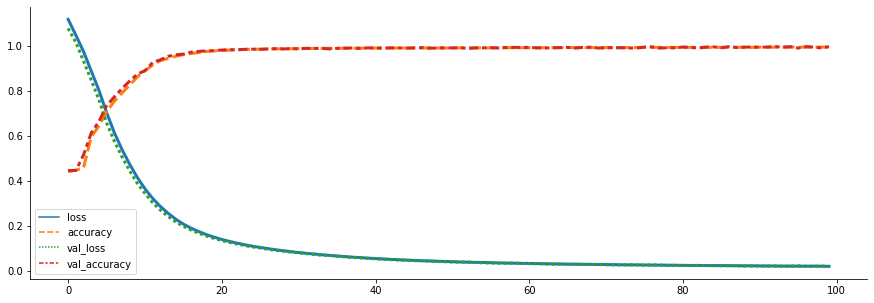

In [51]:
loss=pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine() 

In [54]:
import pickle
with open("scaler_c.pkc", "wb") as file:
  pickle.dump(scaler, file)

ann.save("modelC.h5")